# 4. Analyzing the effect of weather on policing
**In this chapter, you will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. You will practice merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills.**

In [1]:
import pandas as pd
ri = pd.read_csv('police.csv')

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

## Exploring the weather dataset
In this chapter, you'll be working with a new dataset to help you determine if weather conditions have an impact on police behavior.

### Introduction to the dataset
The weather data you'll be using was collected by the National Centers for Environmental Information. Our hypothesis is that weather conditions impact police behavior during traffic stops, so ideally we would look up the historical weather at the location of each stop. However, the traffic stops dataset does not specify stop location, so we're going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

### Examining the columns
Let's read the weather dataset into a DataFrame using `read_csv()`, and then look at the head. 

In [3]:
weather = pd.read_csv('weather.csv')
print(weather.head())

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]


You can see that the station column lists the station ID, and there's one row for each date. There are three columns related to temperature(`TAVG`, `TMIN`, `TMAX`), two columns related to wind speed(`AWND`, `WSF2`), and 20 columns related to the presence of certain bad weather conditions(`WT01`...`WT22`).

### Examining the wind speed
Before using a new dataset, it's a good practice to explore the data to check that the values seem reasonable. If you don't find anything unreasonable, then you gain increased confidence that the data is trustworthy. 

For example, let's take a look at the two columns related to wind speed. 


In [4]:
print(weather[['AWND', 'WSF2']].head())

   AWND  WSF2
0  8.95  25.1
1  9.40  14.1
2  6.93  17.0
3  6.93  16.1
4  7.83  17.0


`AWND` is average wind speed in miles per hour, and `WSF2` is the fastest 2-minute wind speed, meaning the fastest wind speed during any 2-minute period. We can use the `describe()` method on these two columns to see summary statistics including the minimum, maximum, and 25th through 75th percentiles.

In [7]:
print(weather[['AWND', 'WSF2']].describe())

              AWND         WSF2
count  4017.000000  4017.000000
mean      8.593707    19.274782
std       3.364601     5.623866
min       0.220000     4.900000
25%       6.260000    15.000000
50%       8.050000    17.900000
75%      10.290000    21.900000
max      26.840000    48.100000


 Notice that the minimum values are above zero, and the fastest wind speed values are greater than the average wind speed values. Also, the numbers seem reasonable given that they are measured in miles per hour. These are all simple signs that the data is trustworthy.

### Creating a box plot
Another way to examine these values is with a box plot, by specifying kind equals box when plotting.

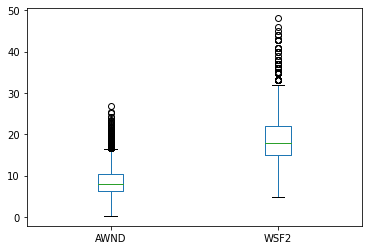

In [8]:
import matplotlib.pyplot as plt
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

This is essentially a visual representation of the summary statistics, in that the box represents the 25th through 75th percentiles, and the lines below and above the box represent the minimum and maximum values, excluding the outliers represented by circles. Again, our goal here is simply to validate that the data looks reasonable.

### Creating a histogram (1)
It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row. We'll do this by subtracting the average speed from the fastest speed and storing the results in a new column.

In [9]:
weather['WDIFF'] = weather.WSF2 - weather.AWND

 We'll visualize the new column using a histogram so that we can see its distribution. 

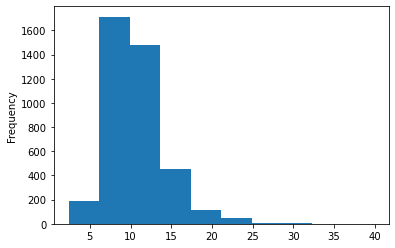

In [11]:
weather.WDIFF.plot(kind='hist')
plt.show()

There are no values below zero, which is a good sign. But because there are some extreme values, it's hard to clearly see the shape of the distribution.

### Creating a histogram (2)
We can make the shape more clear by changing the number of histogram `bins` to `20`.

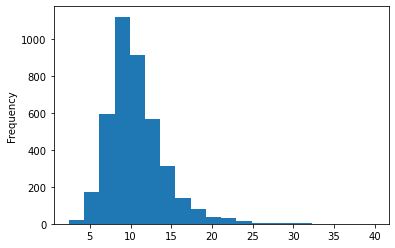

In [12]:
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

This creates more narrow bins than the default value of 10. We can now see that the difference between the fastest and average wind speed values has an approximately normal shape. Many natural phenomena have a normal distribution, and so this shape is another sign that the dataset is trustworthy.

## Plotting the temperature
In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

- Select the temperature columns (`TMIN`, `TAVG`, `TMAX`) and print their summary statistics using the `.describe()` method.
- Create a box plot to visualize the temperature columns.
- Display the plot.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


C:\Users\sj501\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


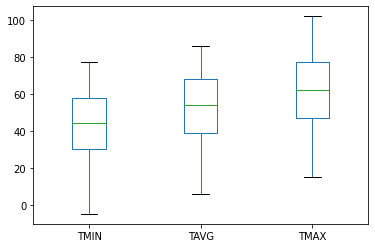

In [15]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

*The temperature data looks good so far: the `TAVG` values are in between `TMIN` and `TMAX`, and the measurements and ranges seem reasonable.*

## Plotting the temperature difference
In this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

- Create a new column in the `weather` DataFrame named `TDIFF` that represents the difference between the maximum and minimum temperatures.
- Print the summary statistics for `TDIFF` using the `.describe()` method.

In [17]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


- Create a histogram with 20 bins to visualize `TDIFF`.
- Display the plot.

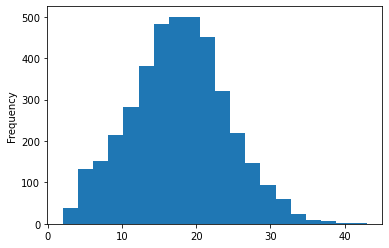

In [18]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

*The `TDIFF` column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.*

---
## Categorizing the weather
Now that we've reviewed the weather dataset and concluded that it's a trustworthy source, we can start preparing it for analysis. But first, let's review a few pandas techniques we'll be using.

### Selecting a DataFrame slice (1)

In [19]:
weather.shape

(4017, 29)

In [20]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF', 'TDIFF'],
      dtype='object')

The weather DataFrame has 4,017 rows and 28 columns. Let's say that we wanted to copy the three temperature columns to a new DataFrame called `temp`. How might we do this?

### Selecting a DataFrame slice (2)
You might recall that the loc accessor allows you to extract a DataFrame slice by specifying the starting and ending labels of your desired selection. In this case, we'll select all rows (represented by the first colon) and the columns `TAVG` through `TMAX` and save them to `temp`. 

In [21]:
temp = weather.loc[:, 'TAVG':'TMAX']
temp.shape

(4017, 3)

In [22]:
temp.columns

Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

You can see that the temp DataFrame contains all 4,017 rows but just 3 columns. This method is particularly useful when you need to select a large number of columns that are side-by-side.

### DataFrame operations
Let's take a look at the head of `temp`.

In [23]:
print(temp.head())

   TAVG  TMIN  TMAX
0  44.0    35    53
1  36.0    28    44
2  49.0    44    53
3  42.0    39    45
4  36.0    28    43


What would happen if you used the `sum()` method on the DataFrame? `pandas` will actually return the sum of each of the three columns.

In [24]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

But what if you wanted to calculate the sum of each row? You can do this by specifying `axis=columns`, and you'll see that each value is the sum of the three temperature values in that row.

In [26]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

You may find it confusing that specifying the columns axis leads pandas to calculate row sums. But for mathematical operations, the axis specifies the array dimension that is being aggregated, and aggregating the columns is how you combine the data for each row.

### Mapping one set of values to another
Let's return to the traffic stops dataset and the `stop_duration` column. 

In [42]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

You can map one set of values to another using the Series `map()` method. 

In this case, we'll create a dictionary that maps the stop_duration values to the strings short, medium, and long. Then we'll use the `map()` method to create a column called `stop_length`. 

In [43]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

dtype('O')

The `stop_length` column has the object data type since it contains string data.

### Changing data type from object to category (1)

In [44]:
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

Whenever you have an object column with a small number of possible values, as is the case here, you may want to change its data type to category. The main reason to use the **category type** is that it **stores the data more efficiently** than the object type. Another reason is that it **allows you to specify a logical order for the categories**. Before we change the data type of the `stop_length Series`, we'll use a Series method to calculate its current memory usage, which is over 6 megabytes.

In [45]:
ri.stop_length.memory_usage(deep=True)

6068041

### Changing data type from object to category (2)
To change the data type, we first create a Python list called `cats` that defines the logical order of the categories. 

In [46]:
cats = ['short', 'medium', 'long']

Second, we use the `astype()` method to specify the new data type.

In [47]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
ri['stop_length'] = ri.stop_length.astype(cat_type)

 We also specify that it should be ordered, and the cats list defines the ordering. By changing the data type, you can see that the memory usage of this column has been changed to around 7.7 megabytes.


In [48]:
ri.stop_length.memory_usage(deep=True)

779118

### Using ordered categories (1)
Let's take a look at the head of this column.

In [49]:
print(ri.stop_length.head())

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']


 In the bottom two lines, you can see that the `dtype` is now category and the categories are ordered from short to long. Because of the ordering, you can now use comparison operators with this column.

### Using ordered categories (2)
For example, you can specify that `stop_length` is greater than short in order to filter the DataFrame to only include medium or long stops.

In [50]:
ri[ri.stop_length > 'short'].shape

(16959, 14)

 In addition, pandas will automatically sort ordered categories logically rather than alphabetically, 

In [51]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

which can make the results of a calculation easier to understand.

## Counting bad weather conditions
The `weather` DataFrame contains 20 columns that start with `'WT'`, each of which represents a bad weather condition. For example:

`WT05` indicates "Hail"

`WT11` indicates "High or damaging winds"

`WT17` indicates "Freezing rain"

For every row in the dataset, each `WT` column contains either a `1` (meaning the condition was present that day) or `NaN` (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of `1` values in each row.

- Copy the columns `WT01` through `WT22` from `weather` to a new DataFrame named `WT`.
- Calculate the sum of each row in `WT`, and store the results in a new `weather` column named `bad_conditions`.
- Replace any missing values in `bad_conditions` with a `0`.
- Create a histogram to visualize `bad_conditions`, and then display the plot.

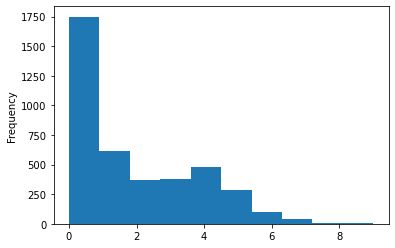

In [52]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

*It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.*

## Rating the weather conditions
In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

Convert `0` to `'good'`

Convert `1` through `4` to `'bad'`

Convert `5` through `9` to `'worse'`

- Count the unique values in the `bad_conditions` column and sort the index.

In [53]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


- Create a dictionary called `mapping` that maps the `bad_conditions` integers to strings as specified above.
- Convert the `bad_conditions` integers to strings using the `mapping` and store the results in a new column called `rating`.
- Count the unique values in `rating` to verify that the integers were properly converted to strings.

In [54]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


*This rating system should make the weather condition data easier to understand.*

## Changing the data type to category
Since the `rating` column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

- Create a list object called `cats` that lists the weather ratings in a logical order: `'good'`, `'bad'`, `'worse'`.
- Change the data type of the `rating` column from object to category. Make sure to use the `cats` list to define the category ordering.
- Examine the head of the `rating` column to confirm that the categories are logically ordered.

In [56]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
cat_type = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather.rating.astype(cat_type)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


*The `rating` column will be used to analyze the effects of weather on police behavior.*

---
## Merging datasets
Now that we've assigned a rating to the weather conditions each day, we need to merge that data with the traffic stop data so that we can analyze the relationship between weather and police behavior. Let's review how to merge two DataFrames.

### Preparing the first DataFrame
We'll return to the DataFrame of Apple stock prices.
```python
apple
```
```
                        date   time   price
date_and_time                        
2018-02-14 09:30:00  2/14/18   9:30  163.04  
2018-02-14 16:00:00  2/14/18  16:00  167.37 
2018-02-15 09:30:00  2/15/18   9:30  169.79
2018-02-15 16:00:00  2/15/18  16:00  172.99  
```

This time, the opening price at 9:30 AM and closing price at 4:00 PM are listed for each day in separate rows. Shortly, we're going to merge the apple DataFrame with another DataFrame. Because the index will be lost during the merge, we want to save it by moving it to a DataFrame column. We'll do this by using the `reset_index()` method and specifying that the operation should occur in place.  
```python
apple.reset_index(inplace=True)
apple
```
```                     
        date_and_time     date   time   price                      
0 2018-02-14 09:30:00  2/14/18   9:30  163.04  
1 2018-02-14 16:00:00  2/14/18  16:00  167.37 
2 2018-02-15 09:30:00  2/15/18   9:30  169.79
3 2018-02-15 16:00:00  2/15/18  16:00  172.99  
```

You can see that `date_and_time` is now a DataFrame column, and the index is now the default integer index.

### Preparing the second DataFrame
The second DataFrame we're working with is called `high_low`, and it contains the highest and lowest prices the Apple stock reached each day.
```python
high_low
```
```
     DATE    HIGH     LOW
0 2/14/18  167.54  162.88
1 2/15/18  173.09  169.00
2 2/16/18  174.82  171.77
```

We'd like to include the high data in the apple DataFrame, which we can do by merging the DataFrames. For the merge operation, we only need two columns from `high_low`: the date column, since it's the column on which the DataFrames will be joined, and the high column, since it's the column of interest. Thus, we'll create a new DataFrame called high that only includes these two columns.
```python
high = high[['DATE', 'HIGH']]
```
```
     DATE    HIGH
0 2/14/18  167.54
1 2/15/18  173.09
2 2/16/18  174.82
```


### Merging the DataFrames
To merge the apple and high DataFrames, we'll use the `pd.merge()` function and save the result as `apple_high`.
```python
apple_high = pd.merge(left=apple, right=high,
                      left_on='date', right_on='DATE',
                      how='left')
```

Let's review the five arguments. 
- First, we specified the left and right DataFrames. Apple is defined as left and high is defined as right because we wanted to join the high DataFrame onto the apple DataFrame. 
- Next, we specified the columns on which to join the DataFrames. Both DataFrames have a column containing the date, but we had to specify them separately because the column name is lowercase in the left DataFrame and uppercase in the right DataFrame. 
- Finally, we specified the type of join. We used a left join in order to keep all of the rows from the left DataFrame regardless of whether there were matches in the right DataFrame.

### Comparing the DataFrames
Let's compare the merged DataFrame with the original two DataFrames. 
```python
apple_high
```
```
        date_and_time     date   time   price     DATE    HIGH                      
0 2018-02-14 09:30:00  2/14/18   9:30  163.04  2/14/18  167.54  
1 2018-02-14 16:00:00  2/14/18  16:00  167.37  2/14/18  167.54
2 2018-02-15 09:30:00  2/15/18   9:30  169.79  2/15/18  173.09 
3 2018-02-15 16:00:00  2/15/18  16:00  172.99  2/15/18  173.09 
```

The first four columns of `apple_high` are identical to `apple`. The data in the final two columns of `apple_high` came from the `high` DataFrame. Because the apple DataFrame contained two rows each from February 14 and 15, the high value of each of those dates appears twice in the `apple_high` DataFrame. But since the apple DataFrame did not contain any rows from February 16, the February 16 value from the high DataFrame was ignored.

### Setting the index
Since the merge is complete, we'll set the `date_and_time` column as the index of the `apple_high` DataFrame. 
```python
apple_high.set_index('date_and_time', inplace=True)
```
```
                        date   time   price     DATE    HIGH   
date_and_time                     
2018-02-14 09:30:00  2/14/18   9:30  163.04  2/14/18  167.54  
2018-02-14 16:00:00  2/14/18  16:00  167.37  2/14/18  167.54
2018-02-15 09:30:00  2/15/18   9:30  169.79  2/15/18  173.09 
2018-02-15 16:00:00  2/15/18  16:00  172.99  2/15/18  173.09 
```

This replaces the default index and reduces the number of columns to five.

## Preparing the DataFrames
In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the `ri` DataFrame, you'll move the `stop_datetime` index to a column since the index will be lost during the merge.
2. With the `weather` DataFrame, you'll select the `DATE` and `rating` columns and put them in a new DataFrame.

- Reset the index of the `ri` DataFrame.
- Examine the head of `ri` to verify that `stop_datetime` is now a DataFrame column, and the index is now the default integer index.

In [58]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

   index       stop_datetime   stop_date stop_time driver_gender driver_race  \
0      0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1      1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2      2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3      3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4      4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs

- Create a new DataFrame named `weather_rating` that contains only the `DATE` and `rating` columns from the `weather` DataFrame.
- Examine the head of `weather_rating` to verify that it contains the proper columns.

In [59]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


*The ri and weather_rating DataFrames are now ready to be merged.*

## Merging the DataFrames
In this exercise, you'll merge the `ri` and `weather_rating` DataFrames into a new DataFrame, `ri_weather`.

The DataFrames will be joined using the stop_date column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case.

Once the merge is complete, you'll set `stop_datetime` as the index, which is the column you saved in the previous exercise.

- Examine the shape of the `ri` DataFrame.

In [60]:
# Examine the shape of 'ri'
print(ri.shape)

(86536, 16)


- Merge the `ri` and `weather_rating` DataFrames using a left join.
- Examine the shape of `ri_weather` to confirm that it has two more columns but the same number of rows as `ri`.
- Replace the index of `ri_weather` with the `stop_datetime` column.

In [61]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)


*`ri_weather` will be used to analyze the relationship between weather conditions and police behavior.*

---
## Does weather affect the arrest rate?
Now that we've merged the weather and traffic stop data, we can analyze the relationship between weather and police behavior.

### Driver gender and vehicle searches
In a previous chapter, we investigated the relationship between driver gender and vehicle searches. 

First, we calculated the percentage of all stops that led to a search by taking the `mean()` of the Boolean Series `search_conducted`. 

In [63]:
ri.search_conducted.mean()

0.0382153092354627

This is called the search rate. 

Then, we compared the search rates for male and female drivers by using a `groupby()` on `driver_gender` before taking the `mean()` of search_conducted. 

In [64]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

We found that male drivers are searched more than twice as often as female drivers.

### Driver gender and vehicle searches
Finally, we added violation to the `groupby()` operation. 



In [65]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Our hypothesis was that search rate varies by violation type, and the difference in search rate between males and females is perhaps because they tend to commit different violations. **The results disproved our hypothesis**, because the search rate is higher for males than for females across all violations. This doesn't prove a causal link between gender and vehicles searches, but it does show a correlation.

### Examining a multi-indexed Series
Let's save the results of the previous operation as new object called search_rate, and print it out again.

In [66]:
search_rate = ri.groupby(['violation', 'driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

 What type of object is this? It may look like a DataFrame because of its structure, but it's actually a pandas Series that has a MultiIndex.

In [68]:
type(search_rate)

pandas.core.series.Series

In [69]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

`violation` and `driver_gender` are not columns, rather they're the names of the index levels. You've seen the MultiIndex before in the context of a DataFrame. With a DataFrame, which is normally two dimensions, the MultiIndex adds a third dimension. With a Series, which is normally one dimension, the MultiIndex adds a second dimension.

### Working with a multi-indexed Series
Let's print out the `search_rate` Series again.

In [70]:
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

 Working with a multi-indexed Series is actually very similar to working with a DataFrame. You can think of the outer index level, violation, as the DataFrame rows, and the inner index level, driver_gender, as the DataFrame columns. 
 
For example, we can use the `loc` accessor to select the Equipment row. 

In [71]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

This returns the search rate by gender for equipment violations only. Or, we can specify the Equipment row and the Male column to select a particular value in the Series.

In [72]:
search_rate.loc['Equipment', 'M']

0.07149643705463182

### Converting a multi-indexed Series to a DataFrame
You might think that if a multi-indexed Series is similar to a DataFrame, then there should be a way to convert one to the other. In fact, if you `unstack()` the search_rate Series, it actually results in a DataFrame.

In [74]:
print(search_rate.unstack())

driver_gender               F         M
violation                              
Equipment            0.039984  0.071496
Moving violation     0.039257  0.061524
Other                0.041018  0.046191
Registration/plates  0.054924  0.108802
Seat belt            0.017301  0.035119
Speeding             0.008309  0.027885


In [75]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

This is a useful technique any time you have a Series with a MultiIndex, since you're probably more comfortable manipulating a DataFrame. You might also think that there should be an easy way to create this DataFrame without using a `groupby` and an `unstack`.

### Converting a multi-indexed Series to a DataFrame
In fact, you can use a `pivot_table` to produce the exact same DataFrame. `violation` is the `index`, `driver_gender` is the `columns`, and the mean of `search_conducted` is the `values`.

In [77]:
print(ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted'))

driver_gender               F         M
violation                              
Equipment            0.039984  0.071496
Moving violation     0.039257  0.061524
Other                0.041018  0.046191
Registration/plates  0.054924  0.108802
Seat belt            0.017301  0.035119
Speeding             0.008309  0.027885


Recall that `mean()` is the default aggregation function for a pivot table, but you can choose another function instead.

## Comparing arrest rates by weather rating
Do police officers arrest drivers more often when the weather is bad? Find out below!

First, you'll calculate the overall arrest rate.

Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.

Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, `good < bad < worse`, they will be sorted that way in the results.

- Calculate the overall arrest rate by taking the mean of the `is_arrested` Series.

In [78]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


- Calculate the arrest rate for each weather `rating` using a `.groupby()`.

In [79]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


- Calculate the arrest rate for each combination of `violation` and `rating`. How do the arrest rates differ by group?

In [80]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


*The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result.*

## Selecting from a multi-indexed Series
The output of a single `.groupby()` operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
In this exercise, you'll practice accessing data from a multi-indexed Series using the `.loc[]` accessor.

- Save the output of the `.groupby()` operation from the last exercise as a new object, `arrest_rate`.
- Print the `arrest_rate` Series and examine it.

In [81]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


- Print the arrest rate for moving violations in bad weather.

In [82]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


- Print the arrest rates for speeding violations in all three weather conditions.

In [83]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


## Reshaping the arrest rate data
In this exercise, you'll start by reshaping the `arrest_rate` Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result.

- Unstack the `arrest_rate` Series to reshape it into a DataFrame.

In [85]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


- Create the exact same DataFrame using a pivot table. Each of the three `.pivot_table()` parameters should be specified as one of the `ri_weather` columns.

In [86]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


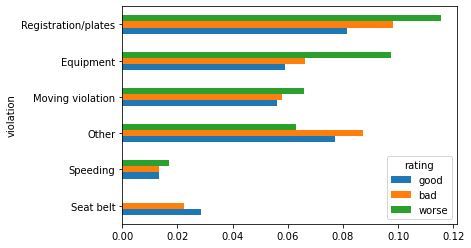

In [98]:
arrest_rate.unstack().sort_values(by='worse').plot(kind='barh')
plt.show()